In [35]:
import numpy as np
import pandas as pd
import scipy
from sklearn.svm import OneClassSVM

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv('./data/iris.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
sepal_length    156 non-null float64
sepal_width     156 non-null float64
petal_length    156 non-null float64
petal_width     156 non-null float64
species         156 non-null object
dtypes: float64(4), object(1)
memory usage: 6.2+ KB


In [16]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,156.000000,156.000000,156.000000,156.000000
mean,5.708333,3.064744,3.742308,1.267949
std,1.061281,0.543561,1.763868,0.885364
min,2.000000,1.000000,1.000000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.700000,3.000000,4.300000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,5.000000,6.900000,5.000000


In [17]:
category='species'
print(df[category].unique())
print(df.groupby(category).mean())


['setosa' 'versicolor' 'virginica']
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          4.890385     3.382692      1.523077     0.311538
versicolor      5.784615     2.759615      4.211538     1.351923
virginica       6.450000     3.051923      5.492308     2.140385


In [20]:
df_float=df.drop(category,axis=1)
ocsvm = OneClassSVM(nu=0.05)
ocsvm.fit(X=df_float)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.05, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [24]:
y_pred_svm = ocsvm.predict(df_float)
df["outlier_flg"]=y_pred_svm

df.loc[df.outlier_flg==-1]

,sepal_length,sepal_width,petal_length,petal_width,species,outlier_flg
13,4.3,3.0,1.1,0.1,setosa,-1
15,5.7,4.4,1.5,0.4,setosa,-1
41,4.5,2.3,1.3,0.3,setosa,-1
50,7.0,3.2,4.7,1.4,versicolor,-1
62,6.0,2.2,4.0,1.0,versicolor,-1
100,6.3,3.3,6.0,2.5,virginica,-1
106,4.9,2.5,4.5,1.7,virginica,-1
117,7.7,3.8,6.7,2.2,virginica,-1
131,7.9,3.8,6.4,2.0,virginica,-1
152,3.0,5.0,4.0,5.0,virginica,-1


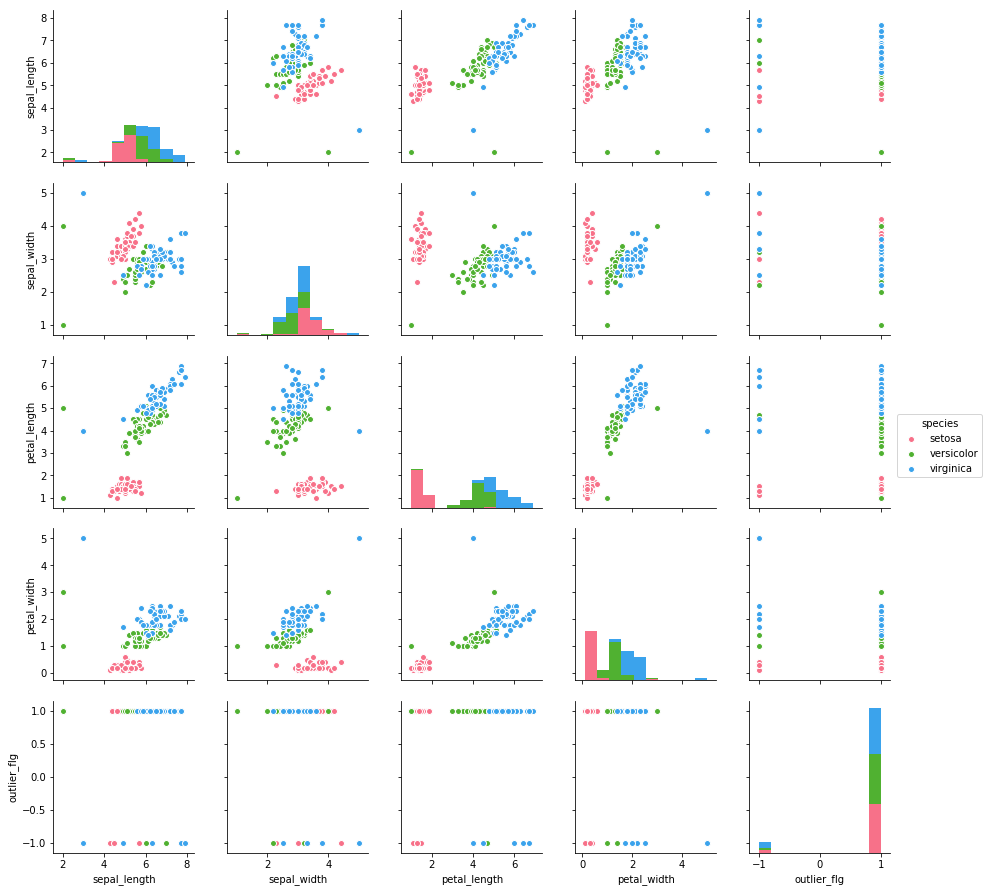

In [30]:
g = sns.pairplot(df, hue=category, palette="husl")

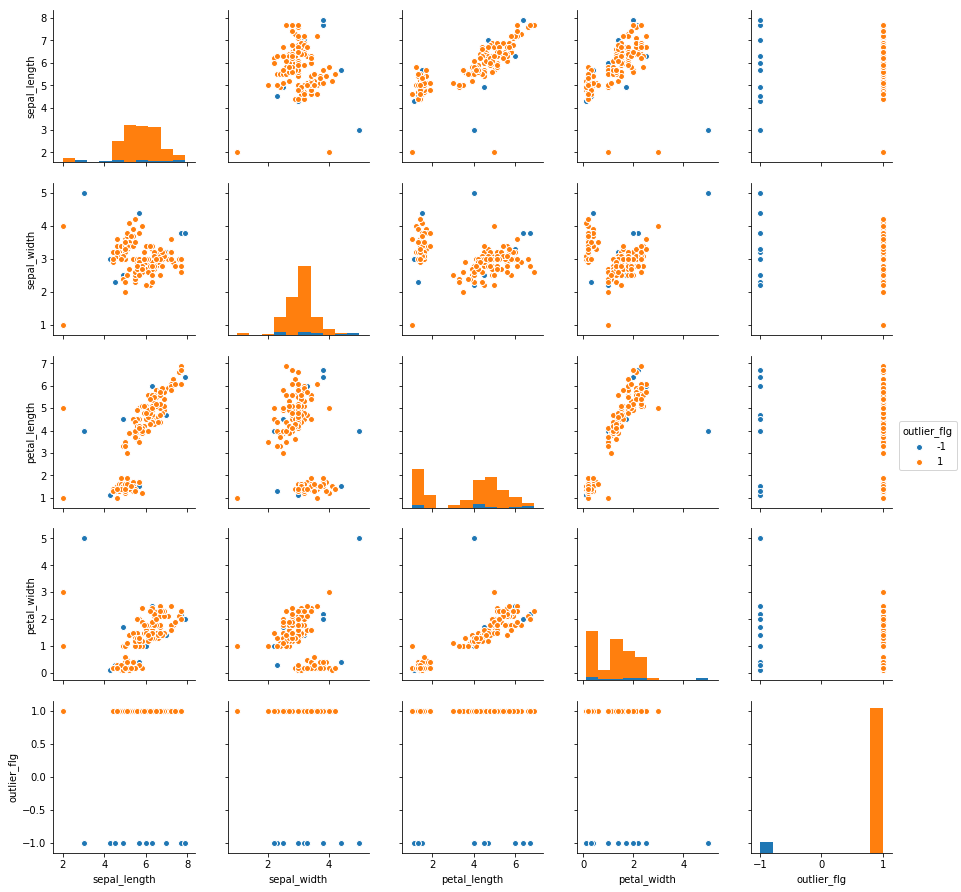

In [31]:
g = sns.pairplot(df, hue="outlier_flg")

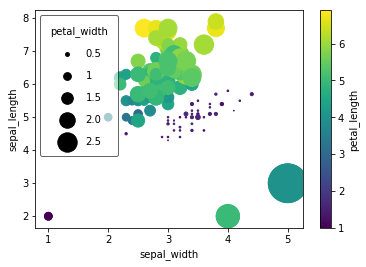

In [36]:
plt.scatter(df.sepal_width, df.sepal_length, 
            c = df.petal_length, s=(df.petal_width**2)*60, cmap="viridis")
ax = plt.gca()

plt.colorbar(label="petal_length")
plt.xlabel("sepal_width")
plt.ylabel("sepal_length")

#make a legend:
pws = [0.5, 1, 1.5, 2., 2.5]
for pw in pws:
    plt.scatter([], [], s=(pw**2)*60, c="k",label=str(pw))

h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[1:], l[1:], labelspacing=1.2, title="petal_width", borderpad=1, 
            frameon=True, framealpha=0.6, edgecolor="k", facecolor="w")

plt.show()